In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, MaxPooling2D, Convolution2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical



print(tf.__version__)

2.2.0-rc3


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

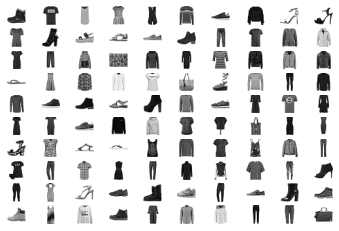

In [ ]:
for i in range(100):
	plt.subplot(10, 10, 1 + i)
	plt.axis('off')
	plt.imshow(train_x[i], cmap='gray_r')
plt.show()

In [ ]:
Train_data= train_x.shape[0]
Test_data= test_x.shape[0]
print("No. of train images:", Train_data)
print("No. of test images:", Test_data)

No. of train images: 60000
No. of test images: 10000


In [ ]:
print("Size of Image:",train_x[0].shape)
print("Size of image:", train_x.shape[1]*train_x.shape[1])

Size of Image: (28, 28)
Size of image: 784


In [ ]:
 print("Unique labels are:", np.unique(train_y))

Unique labels are: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
These are the unique labels:

0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [ ]:
print("Numeric scale of the input:",train_x.ptp())

Numeric scale of the input: 255


In [ ]:
train_y= to_categorical(train_y)
test_y= to_categorical(test_y)

# Constructing input pipeline

In [ ]:
train_x =tf.image.convert_image_dtype(train_x, tf.float32)
train_x=train_x/255
test_x =tf.image.convert_image_dtype(test_x, tf.float32)
test_x = test_x/255



In [ ]:

# Training dataset placeholders
train_x_op = tf.compat.v1.placeholder(shape=train_x.shape, dtype=tf.float32, name='train_x_ph')
train_y_op = tf.compat.v1.placeholder(shape=train_y.shape, dtype=tf.int64, name='train_y_ph')

# Test dataset placeholders
test_x_op = tf.compat.v1.placeholder(shape=test_x.shape, dtype=tf.float32, name='test_x_ph')
test_y_op = tf.compat.v1.placeholder(shape=test_y.shape, dtype=tf.int64, name='test_y_ph')

# placeholder for the batch size, we need it to change the
# batch size when we switch between datasets.
batch_size_op = tf.compat.v1.placeholder(dtype=tf.int64)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(batch_size=32).repeat()



In [ ]:
train_x_op.shape

TensorShape([Dimension(60000), Dimension(28), Dimension(28)])

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y))
test_dataset = test_dataset.shuffle(buffer_size=10000).batch(batch_size=32).repeat()


Deep forward neural network



In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=["accuracy"])


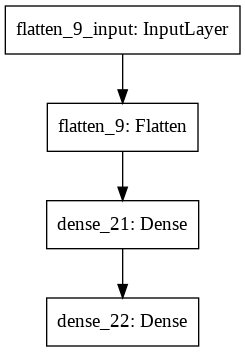

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
batch_size=128
Epochs=1000
STEPS_PER_EPOCH=100

history=model.fit(train_dataset,batch_size=batch_size,epochs=Epochs,validation_data=test_dataset,
                  steps_per_epoch=STEPS_PER_EPOCH,validation_steps=50,verbose=1,shuffle=True)

Epoch 1/1000
100/100 [==============================] - 1s 6ms/step - loss: 1.5654 - accuracy: 0.4822 - val_loss: 1.0352 - val_accuracy: 0.6581
Epoch 2/1000
100/100 [==============================] - 0s 5ms/step - loss: 0.8546 - accuracy: 0.6944 - val_loss: 0.7796 - val_accuracy: 0.7138
Epoch 3/1000
100/100 [==============================] - 0s 5ms/step - loss: 0.7384 - accuracy: 0.7287 - val_loss: 0.6414 - val_accuracy: 0.7719
Epoch 4/1000
100/100 [==============================] - 0s 5ms/step - loss: 0.6742 - accuracy: 0.7462 - val_loss: 0.6280 - val_accuracy: 0.7713
Epoch 5/1000
100/100 [==============================] - 0s 5ms/step - loss: 0.6380 - accuracy: 0.7681 - val_loss: 0.6500 - val_accuracy: 0.7506
Epoch 6/1000
100/100 [==============================] - 0s 5ms/step - loss: 0.6151 - accuracy: 0.7666 - val_loss: 0.5842 - val_accuracy: 0.7850
Epoch 7/1000
100/100 [==============================] - 0s 5ms/step - loss: 0.5740 - accuracy: 0.7859 - val_loss: 0.5913 - val_accuracy:

In [ ]:
loss_value,acc_value=model.evaluate(test_dataset,steps=50,verbose=0)
print("Test Accuracy ", acc_value)

Test Accuracy  0.8824999928474426


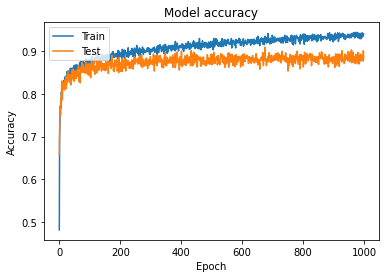

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

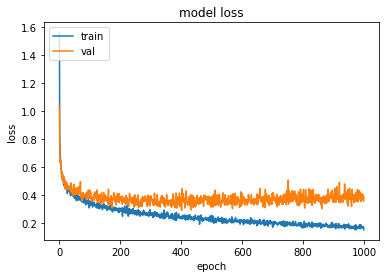

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Fine-tuning the model


In [ ]:
model_dropout = Sequential()
model_dropout.add(keras.layers.Flatten(input_shape=(28, 28)))
model_dropout.add(keras.layers.Dense(128))
model_dropout.add(keras.layers.Dropout(0.5))
model_dropout.add(keras.layers.Activation('relu'))
model_dropout.add(keras.layers.Dense(128))
model_dropout.add(keras.layers.Dropout(0.5))
model_dropout.add(keras.layers.Activation('relu'))
model_dropout.add(keras.layers.Dense(10))
model_dropout.add(keras.layers.Activation('softmax'))
model_dropout.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=["accuracy"])
model_dropout.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_10 (Activation)   (None, 128)              

In [ ]:

history=model_dropout.fit(train_dataset,validation_data=test_dataset,batch_size=batch_size,epochs=Epochs,
                  steps_per_epoch=STEPS_PER_EPOCH,validation_steps=50, verbose=1,shuffle=True)

Epoch 1/1000
100/100 [==============================] - 1s 6ms/step - loss: 2.2355 - accuracy: 0.1619 - val_loss: 2.0314 - val_accuracy: 0.2894
Epoch 2/1000
100/100 [==============================] - 1s 5ms/step - loss: 1.7331 - accuracy: 0.3431 - val_loss: 1.4328 - val_accuracy: 0.5138
Epoch 3/1000
100/100 [==============================] - 1s 5ms/step - loss: 1.3832 - accuracy: 0.4503 - val_loss: 1.1934 - val_accuracy: 0.5537
Epoch 4/1000
100/100 [==============================] - 1s 5ms/step - loss: 1.2858 - accuracy: 0.4647 - val_loss: 1.1137 - val_accuracy: 0.5412
Epoch 5/1000
100/100 [==============================] - 0s 5ms/step - loss: 1.1889 - accuracy: 0.5131 - val_loss: 1.0390 - val_accuracy: 0.6187
Epoch 6/1000
100/100 [==============================] - 1s 5ms/step - loss: 1.1419 - accuracy: 0.5375 - val_loss: 0.9992 - val_accuracy: 0.6275
Epoch 7/1000
100/100 [==============================] - 0s 5ms/step - loss: 1.1010 - accuracy: 0.5444 - val_loss: 0.9531 - val_accuracy:

In [ ]:
dropout_loss,dropout_accuracy=model_dropout.evaluate(test_dataset,steps=50)
print("Accuracy dropout layers ",dropout_accuracy)

50/50 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8594
Accuracy dropout layers  0.859375


In [ ]:
model_batch = Sequential()
model_batch.add(keras.layers.Flatten(input_shape=(28, 28)))
model_batch.add(keras.layers.Dense(128))
model_batch.add(keras.layers.BatchNormalization())
model_batch.add(keras.layers.Activation('relu'))
model_batch.add(keras.layers.BatchNormalization())
model_batch.add(keras.layers.Dense(10))
model_batch.add(keras.layers.Activation('softmax'))                            

model_batch.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [ ]:

batch_history=model_batch.fit(train_dataset,batch_size=batch_size,epochs=Epochs,validation_data=test_dataset,
                  steps_per_epoch=STEPS_PER_EPOCH,validation_steps=50)

Epoch 1/1000
100/100 [==============================] - 1s 7ms/step - loss: 0.7743 - accuracy: 0.7306 - val_loss: 2.2734 - val_accuracy: 0.1019
Epoch 2/1000
100/100 [==============================] - 1s 6ms/step - loss: 0.5535 - accuracy: 0.8062 - val_loss: 2.2321 - val_accuracy: 0.1525
Epoch 3/1000
100/100 [==============================] - 1s 6ms/step - loss: 0.5003 - accuracy: 0.8222 - val_loss: 2.1114 - val_accuracy: 0.2013
Epoch 4/1000
100/100 [==============================] - 1s 6ms/step - loss: 0.4910 - accuracy: 0.8166 - val_loss: 1.8124 - val_accuracy: 0.5113
Epoch 5/1000
100/100 [==============================] - 1s 6ms/step - loss: 0.4695 - accuracy: 0.8328 - val_loss: 1.2169 - val_accuracy: 0.7725
Epoch 6/1000
100/100 [==============================] - 1s 6ms/step - loss: 0.4777 - accuracy: 0.8288 - val_loss: 0.9843 - val_accuracy: 0.7025
Epoch 7/1000
100/100 [==============================] - 1s 6ms/step - loss: 0.4435 - accuracy: 0.8406 - val_loss: 0.7410 - val_accuracy:

In [ ]:
batch_loss,batch_acc=model_batch.evaluate(test_dataset,steps=50)
print(" batch normalization Accuracy ",batch_acc)

50/50 [==============================] - 0s 3ms/step - loss: 0.4863 - accuracy: 0.8775
 batch normalization Accuracy  0.8774999976158142


In [ ]:
model_batch_epoch = Sequential()
model_batch_epoch.add(keras.layers.Flatten(input_shape=(28, 28)))
model_batch_epoch.add(keras.layers.Dense(128))
model_batch_epoch.add(keras.layers.BatchNormalization())
model_batch_epoch.add(keras.layers.Activation('relu'))
model_batch_epoch.add(keras.layers.BatchNormalization())
model_batch_epoch.add(keras.layers.Dense(10))
model_batch_epoch.add(keras.layers.Activation('softmax'))                            

model_batch_epoch.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [ ]:
Epochs_new=300
batch_history=model_batch_epoch.fit(train_dataset,batch_size=batch_size,epochs=Epochs_new,validation_data=test_dataset,
                  steps_per_epoch=STEPS_PER_EPOCH,validation_steps=50)

Epoch 1/300
100/100 [==============================] - 1s 7ms/step - loss: 0.7941 - accuracy: 0.7212 - val_loss: 2.2798 - val_accuracy: 0.0919
Epoch 2/300
100/100 [==============================] - 1s 6ms/step - loss: 0.5253 - accuracy: 0.8103 - val_loss: 2.2356 - val_accuracy: 0.1056
Epoch 3/300
100/100 [==============================] - 1s 6ms/step - loss: 0.5292 - accuracy: 0.8134 - val_loss: 2.1218 - val_accuracy: 0.2375
Epoch 4/300
100/100 [==============================] - 1s 6ms/step - loss: 0.4891 - accuracy: 0.8169 - val_loss: 1.8159 - val_accuracy: 0.4638
Epoch 5/300
100/100 [==============================] - 1s 6ms/step - loss: 0.4821 - accuracy: 0.8278 - val_loss: 1.3353 - val_accuracy: 0.6006
Epoch 6/300
100/100 [==============================] - 1s 6ms/step - loss: 0.4701 - accuracy: 0.8331 - val_loss: 1.1477 - val_accuracy: 0.5375
Epoch 7/300
100/100 [==============================] - 1s 6ms/step - loss: 0.4788 - accuracy: 0.8281 - val_loss: 0.8825 - val_accuracy: 0.6750

In [ ]:
batch_loss_new,batch_acc_new=model_batch_epoch.evaluate(test_dataset,steps=50)
print(" batch normalization Accuracy ",batch_acc_new)

50/50 [==============================] - 0s 3ms/step - loss: 0.7473 - accuracy: 0.8019
 batch normalization Accuracy  0.8018749952316284


In [ ]:
from tensorflow.keras.regularizers import l2
model_weight = Sequential()
model_weight.add(Flatten(input_shape=(28, 28)))
model_weight.add(keras.layers.Dense(32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
model_weight.add(keras.layers.Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
model_weight.add(Dense(10, activation='softmax'))                           

model_weight.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [ ]:
weight_history=model_weight.fit(train_dataset,validation_data=test_dataset, batch_size=batch_size,epochs=Epochs,
                  steps_per_epoch=STEPS_PER_EPOCH,validation_steps=50)

Epoch 1/1000
100/100 [==============================] - 1s 6ms/step - loss: 2.6940 - accuracy: 0.0947 - val_loss: 2.3924 - val_accuracy: 0.1019
Epoch 2/1000
100/100 [==============================] - 0s 5ms/step - loss: 2.3399 - accuracy: 0.1053 - val_loss: 2.3132 - val_accuracy: 0.1019
Epoch 3/1000
100/100 [==============================] - 0s 5ms/step - loss: 2.3072 - accuracy: 0.0903 - val_loss: 2.3040 - val_accuracy: 0.1025
Epoch 4/1000
100/100 [==============================] - 0s 5ms/step - loss: 2.3032 - accuracy: 0.1041 - val_loss: 2.3025 - val_accuracy: 0.1069
Epoch 5/1000
100/100 [==============================] - 1s 5ms/step - loss: 2.3027 - accuracy: 0.1066 - val_loss: 2.3029 - val_accuracy: 0.1063
Epoch 6/1000
100/100 [==============================] - 0s 5ms/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3033 - val_accuracy: 0.0894
Epoch 7/1000
100/100 [==============================] - 0s 5ms/step - loss: 2.3030 - accuracy: 0.1016 - val_loss: 2.3028 - val_accuracy:

In [ ]:
Reg_loss,Reg_acc=model_batch.evaluate(test_dataset,steps=50, verbose=0)
print(" Reg Weight Accuracy ",Reg_acc)

 Reg Weight Accuracy  0.8737499713897705


In [ ]:
model_lr = Sequential()
model_lr.add(Flatten(input_shape=(28, 28)))
model_lr.add(Dense(128, activation='relu'))
model_lr.add(Dense(10, activation='softmax'))

model_lr.compile(optimizer = Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=["accuracy"])


In [ ]:
lr_history=model_lr.fit(train_dataset,validation_data=test_dataset, batch_size=batch_size,epochs=Epochs,
                  steps_per_epoch=STEPS_PER_EPOCH,validation_steps=50)

Epoch 1/1000
100/100 [==============================] - 1s 6ms/step - loss: 2.2428 - accuracy: 0.4613 - val_loss: 2.1455 - val_accuracy: 0.5119
Epoch 2/1000
100/100 [==============================] - 0s 5ms/step - loss: 1.9672 - accuracy: 0.5028 - val_loss: 1.7854 - val_accuracy: 0.4613
Epoch 3/1000
100/100 [==============================] - 0s 5ms/step - loss: 1.6290 - accuracy: 0.5241 - val_loss: 1.5264 - val_accuracy: 0.5200
Epoch 4/1000
100/100 [==============================] - 0s 5ms/step - loss: 1.4152 - accuracy: 0.5816 - val_loss: 1.3292 - val_accuracy: 0.5800
Epoch 5/1000
100/100 [==============================] - 0s 5ms/step - loss: 1.2593 - accuracy: 0.6169 - val_loss: 1.2089 - val_accuracy: 0.6106
Epoch 6/1000
100/100 [==============================] - 0s 5ms/step - loss: 1.1732 - accuracy: 0.6200 - val_loss: 1.1294 - val_accuracy: 0.6531
Epoch 7/1000
100/100 [==============================] - 0s 5ms/step - loss: 1.0751 - accuracy: 0.6719 - val_loss: 1.0450 - val_accuracy:

In [ ]:
lr_loss,lr_acc=model_lr.evaluate(test_dataset,steps=50, verbose=0)
print(" New Learning rate Accuracy ",lr_acc)

 New Learning rate Accuracy  0.8631250262260437



|Dropout (rate)   | Batch Normalisation (Y/N)  |Optimiser       Regularisation  | Learning Rate  | Number of Epochs   |  Test Accuracy |
|---|---|---|---|---|---|   
|  0.5 |   |   |1000   |   | 0.85  |
|   |  Y |   |   | 1000  |  0.87 |
|   |  Y |   |   | 300  |   0.80|
|   |   |   | 0.001  | 1000  |   0.86|  
|   |   |    L2  | 0.01  | 1000  |   0.87|  
        